In [16]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install geopandas


Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install pg8000


Note: you may need to restart the kernel to use updated packages.


In [20]:
import pg8000
import pandas as pd

conn = pg8000.connect(
    host="localhost", 
    database="crime_data",  
    user="postgres",  
    password="Thiri@2003",  
    port="5432"
)

cursor = conn.cursor()
cursor.execute("SELECT * FROM crime_data")

rows = cursor.fetchall()

columns = [desc[0] for desc in cursor.description]
for row in rows:
    print(row)

cursor.close()
conn.close()

df = pd.DataFrame(rows, columns=columns)

print(df.head())

[1001, 'Burglary', 'Shenzhen', datetime.date(2024, 1, 1), datetime.time(0, 0), 63, 30, 'Unknown', Decimal('27.49080238'), Decimal('103.7026586')]
[1002, 'Fraud', 'Wuhan', datetime.date(2024, 1, 1), datetime.time(0, 1), 47, 59, 'Unknown', Decimal('39.01428613'), Decimal('110.8380189')]
[1003, 'Burglary', 'Beijing', datetime.date(2024, 1, 1), datetime.time(0, 2), 57, 20, 'Unknown', Decimal('34.63987884'), Decimal('117.4589167')]
[1004, 'Assault', 'Chongqing', datetime.date(2024, 1, 2), datetime.time(0, 4), 35, 26, 'Knife', Decimal('31.97316968'), Decimal('114.6444977')]
[1005, 'Assault', 'Shenzhen', datetime.date(2024, 1, 2), datetime.time(0, 5), 68, 29, 'None', Decimal('23.12037281'), Decimal('116.131223')]
[1006, 'Theft', 'Guangzhou', datetime.date(2024, 1, 2), datetime.time(0, 7), 65, 40, 'Gun', Decimal('23.11989041'), Decimal('113.1756673')]
[1007, 'Vandalism', 'Shenzhen', datetime.date(2024, 1, 3), datetime.time(0, 8), 19, 31, 'Knife', Decimal('21.16167224'), Decimal('113.8455313')]

In [21]:
print(df.columns)

Index(['crime_id', 'crime_type', 'location', 'date', 'time', 'victim_age',
       'suspect_age', 'weapon_used', 'latitude', 'longitude'],
      dtype='object')


In [22]:
df['date'] = pd.to_datetime(df['date'])

location_counts = df['location'].value_counts()
print(location_counts)


location
Beijing      147
Guangzhou    139
Chengdu      129
Shanghai     122
Xi'an        118
Wuhan        117
Chongqing    116
Shenzhen     112
Name: count, dtype: int64


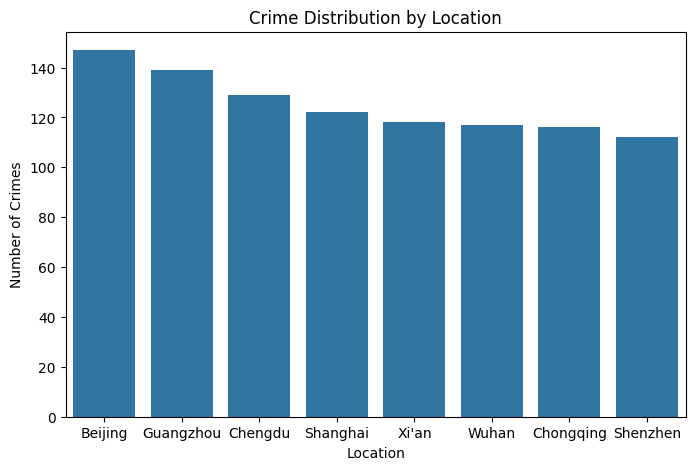

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x=location_counts.index, y=location_counts.values)
plt.title('Crime Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Number of Crimes')
plt.show()

crime_type
Burglary     213
Theft        209
Fraud        203
Vandalism    200
Assault      175
Name: count, dtype: int64


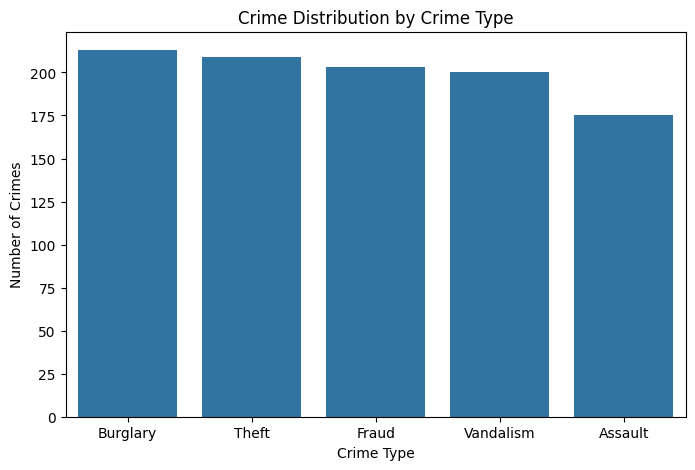

In [24]:
crime_type_counts = df['crime_type'].value_counts()
print(crime_type_counts)

plt.figure(figsize=(8, 5))
sns.barplot(x=crime_type_counts.index, y=crime_type_counts.values)
plt.title('Crime Distribution by Crime Type')
plt.xlabel('Crime Type')
plt.ylabel('Number of Crimes')
plt.show()


In [25]:
import folium
from collections import Counter

df.columns = df.columns.str.lower()

crime_colors = {
    'theft': 'blue',
    'assault': 'green',
    'fraud': 'purple',
    'robbery': 'orange',
    'murder': 'red'
}

base_map = folium.Map(location=[35.8617, 104.1954], zoom_start=5)

crime_count = df['location'].value_counts().to_dict()

for idx, row in df.iterrows():
    crime_type = row['crime_type']
    crime_color = crime_colors.get(crime_type, 'gray') 
    location = row['location']
    crime_rate = crime_count.get(location, 0)
    
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Crime ID: {row['crime_id']}<br>Crime Type: {row['crime_type']}<br>Victim Age: {row['victim_age']}<br>Suspect Age: {row['suspect_age']}<br>Crime Rate at {location}: {crime_rate} crimes",
        icon=folium.Icon(color=crime_color)
    ).add_to(base_map)

base_map.save("crime_distribution_map_colored.html")

base_map


date
2024-01-01    3
2024-01-02    3
2024-01-03    3
2024-01-04    2
2024-01-05    3
             ..
2024-12-27    2
2024-12-28    3
2024-12-29    3
2024-12-30    2
2024-12-31    1
Length: 366, dtype: int64


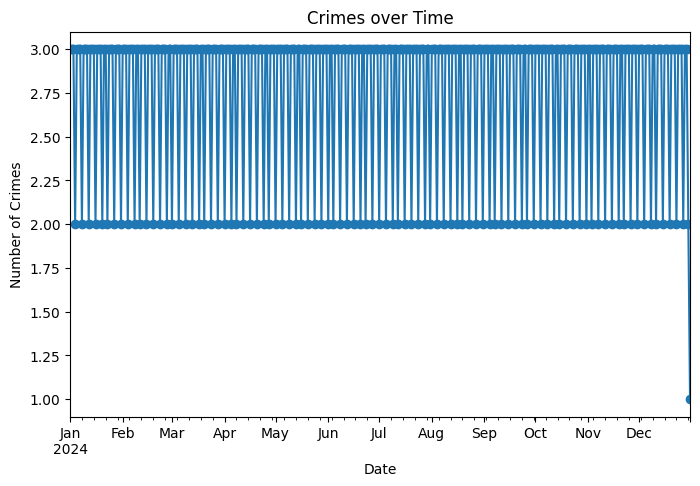

In [28]:

# Crimes by date
crime_by_date = df.groupby('date').size()
print(crime_by_date)

# Plot crimes by date
plt.figure(figsize=(8, 5))
crime_by_date.plot(kind='line', marker='o')
plt.title('Crimes over Time')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.show()


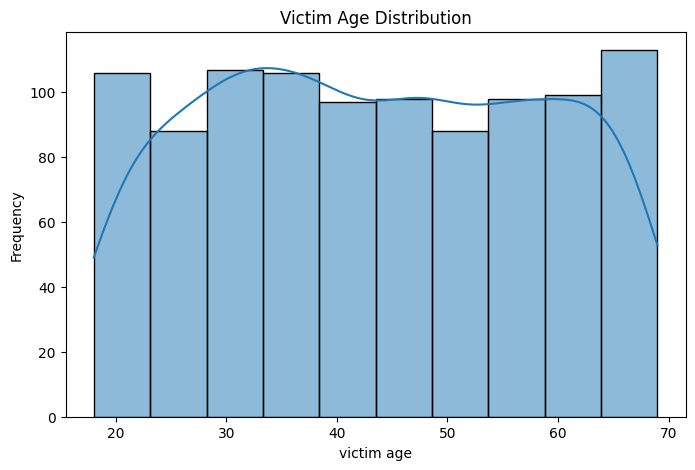

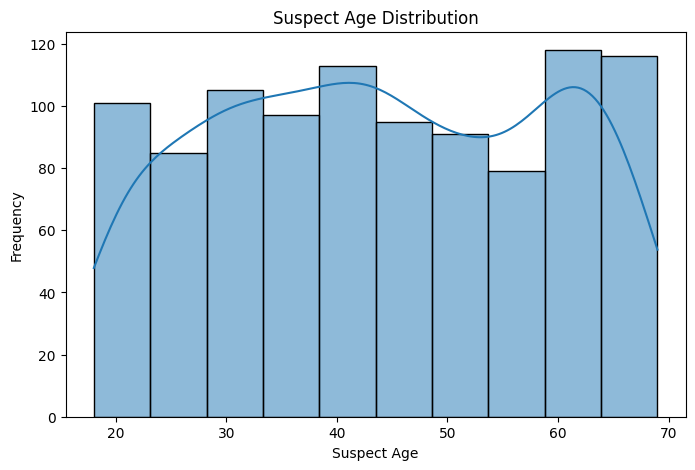

In [30]:
# Crime by victim age distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['victim_age'], kde=True, bins=10)
plt.title('Victim Age Distribution')
plt.xlabel('victim age')
plt.ylabel('Frequency')
plt.show()

# Crime by suspect age distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['suspect_age'], kde=True, bins=10)
plt.title('Suspect Age Distribution')
plt.xlabel('Suspect Age')
plt.ylabel('Frequency')
plt.show()


In [33]:
pip install geodatasets

Note: you may need to restart the kernel to use updated packages.


In [41]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


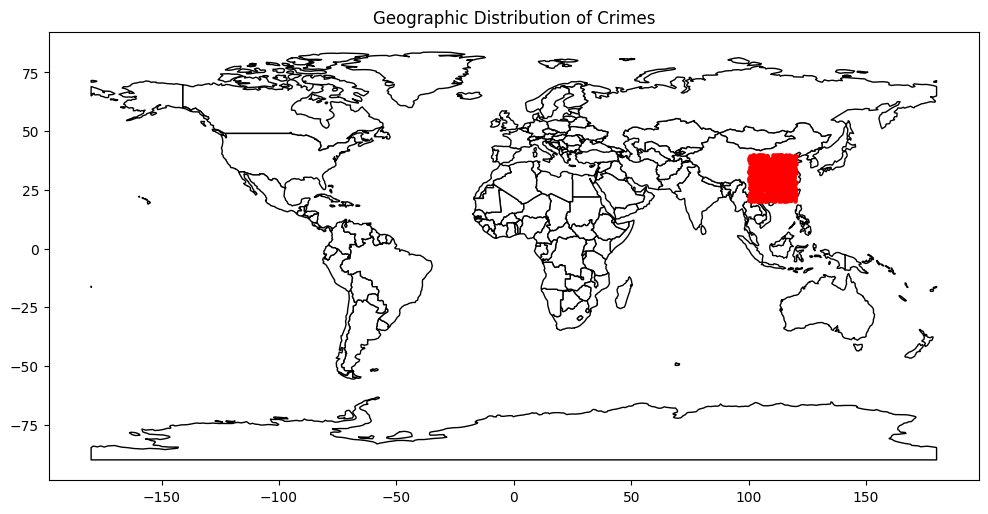

In [51]:
import geopandas as gpd

shapefile_path = "C:\\Users\\mahat\\Downloads\\ne_110m_admin_0_countries\\ne_110m_admin_0_countries.shp"
gdf = gpd.read_file(shapefile_path)

# Create a GeoDataFrame from the crime data (with Latitude and Longitude)
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

base = gdf.plot(figsize=(12, 12), color='white', edgecolor='black')
geo_df.plot(ax=base, marker='o', color='red', markersize=5)
plt.title('Geographic Distribution of Crimes')
plt.show()
